In [260]:
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from typing import Tuple, List
import pandas as pd
import json


In [255]:
onlyfiles = [f for f in listdir('pics') if isfile(join('pics', f))]
# df = pd.DataFrame(onlyfiles)
# df = df.sample(100)
# onlyfiles = list(df[0])

In [55]:

im = Image.open(r"pics/0001.png")

pixel_val = im.getpixel((611, 473))
pixel_val

(54, 58, 57, 255)

In [75]:
def are_similar(pixels: List[Tuple[int, int, int, int]], correct_pixels: List[Tuple[int, int, int, int]], difference = 0.1):
    tresh = 255 * 3 * difference
    for i, pixel in enumerate(pixels):
        if tresh < diff_two_pixels(pixels[i], correct_pixels[i]):
            return False
    return True

def diff_two_pixels(pixel1, pixel2):
    diff = 0
    for i in range(3):
        diff += abs(pixel1[i] - pixel2[i])
    return diff

def get_pixel_vals(locations: List[Tuple[int, int]], img: str):
    im = Image.open(img)
    ret_list = []
    for loc in locations:
        ret_list.append(im.getpixel(loc))
    return ret_list

def gen_labels(file_, name, difference, locations = [(608, 469), (613, 472), (616, 475), (634, 476), (621, 476)]):

    correct_pixel_vals = get_pixel_vals(locations, join('pics', file_))

    ret = []

    for f in onlyfiles:
        if are_similar(get_pixel_vals(locations, join('pics', f)), correct_pixel_vals, difference):
            ret.append(f)
            eyes[f] = name
    print(len(ret))
    return ret

In [257]:
eyes = {}
eyes['0001.png'] = "BlueEyes"
eyes

{'0001.png': 'BlueEyes'}

In [258]:
print('blue')
blue_eyes = gen_labels('0001.png', 'BlueEyes', 0.09)
print('red')
red_eyes = gen_labels('0002.png', 'RedEyes', 0.035)
print('green')
green_eyes = gen_labels('0021.png', 'GreenEyes', 0.05)
print('orange')
orange_eyes = gen_labels('0026.png', 'OrangeEyes', 0.04)
print('brown')
brown_eyes = gen_labels('0031.png', 'BrownEyes', 0.04)
print('yellow')
yellow_eyes = gen_labels('0045.png', 'YellowEyes', 0.04)
print('laser')
laser_eyes = gen_labels('0020.png', 'LaserEyes', 0.02, [(610, 455)])
print('gold shades')
gold_shades = gen_labels('0019.png', 'GoldShades', 0.3, [(666, 425), (692, 444), (694, 486), (379, 539), (338, 527)])
print('black shades')
black_shades = gen_labels('0032.png', 'BlackShades', 0.3, [(666, 425), (692, 444), (694, 486), (379, 539), (338, 527)])
print('gold glasses')
gold_glasses = gen_labels('0065.png', 'GoldGlasses', 0.2, [(666, 425), (692, 444), (694, 486), (380, 486), (373, 487)])

blue
109
red
94
green
111
orange
85
brown
188
yellow
76
laser
68
gold shades
122
black shades
132
gold glasses
132


In [ ]:
blue_eyes = gen_labels('0001.png', 'BlueEyes', 0.09)

In [241]:
red_eyes = gen_labels('0002.png', 'RedEyes', 0.035)

17


In [242]:
green_eyes = gen_labels('0021.png', 'GreenEyes', 0.05)

8


In [243]:
orange_eyes = gen_labels('0026.png', 'OrangeEyes', 0.04)

11


In [244]:
brown_eyes = gen_labels('0031.png', 'BrownEyes', 0.04)

14


In [245]:
yellow_eyes = gen_labels('0045.png', 'YellowEyes', 0.04)

6


In [274]:
laser_eyes = gen_labels('0020.png', 'LaserEyes', 0.02, [(610, 455), (626, 442)])

68


In [247]:
gold_shades = gen_labels('0019.png', 'GoldShades', 0.3, [(666, 425), (692, 444), (694, 486), (379, 539), (338, 527)])

8


In [248]:
black_shades = gen_labels('0032.png', 'BlackShades', 0.3, [(666, 425), (692, 444), (694, 486), (379, 539), (338, 527)])

12


In [249]:
gold_glasses = gen_labels('0065.png', 'GoldGlasses', 0.2, [(666, 425), (692, 444), (694, 486), (380, 486), (373, 487)])

9


In [284]:
json_object = json.dumps(eyes, indent=4)

with open("eyes.json", 'w') as file_:
    file_.write(json_object)




In [267]:
unlabeled = []

for file_ in onlyfiles:
    if (file_ not in eyes.keys()):
        print(file_)
        unlabeled.append(file_)

len(unlabeled)

0

In [ ]:
for i, file in enumerate(unlabeled):
    plt.figure(figsize=(16, 10))
    im = Image.open(join('pics', file))
    im = im.crop((200, 380, 715, 505))
    plt.imshow(im)
    plt.show()
    finta = True
    while (finta):
        finta = False
        string = input()
        if string == 'red':
            eyes[file] = 'RedEyes'
        elif string == 'blue':
            eyes[file] = 'BlueEyes'
        elif string == 'brown':
            eyes[file] = 'BrownEyes'
        elif string == 'orange':
            eyes[file] = 'OrangeEyes'
        elif string == 'green':
            eyes[file] = 'GreenEyes'
        elif string == 'yellow':
            eyes[file] = 'YellowEyes'
        elif string == 'laser':
            eyes[file] = 'LaserEyes'
        elif string == 'bs':
            eyes[file] = 'BlackShades'
        elif string == 'gs':
            eyes[file] = 'GoldShades'
        elif string == 'gg':
            eyes[file] = 'GoldGlasses'
        else:
            finta = True

In [291]:
series = pd.Series(eyes)
series = series.sample(30)

0497.png: GoldShades


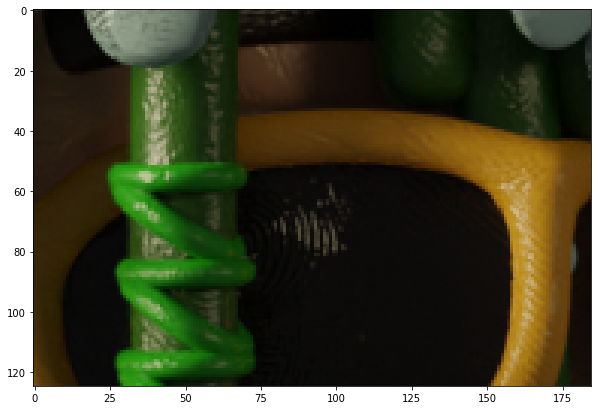

0807.png: LaserEyes


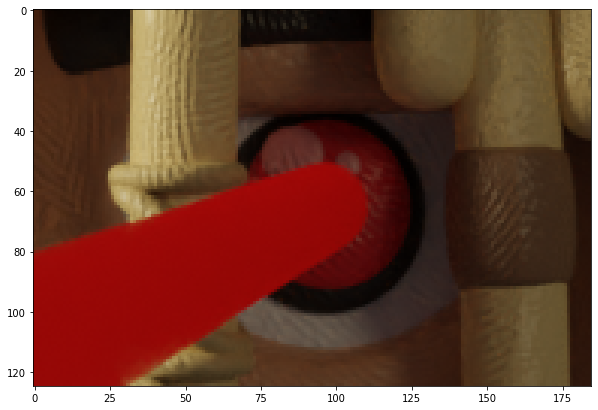

0729.png: LaserEyes


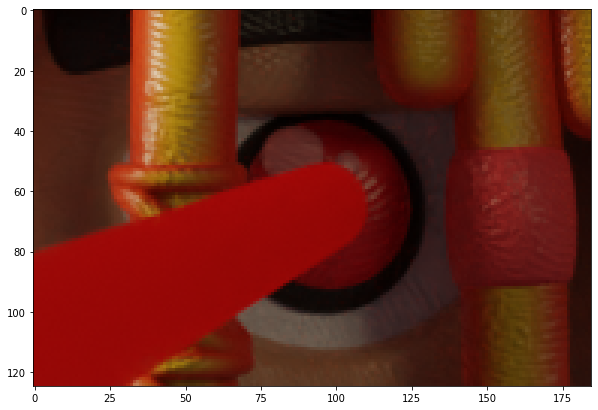

0350.png: BlueEyes


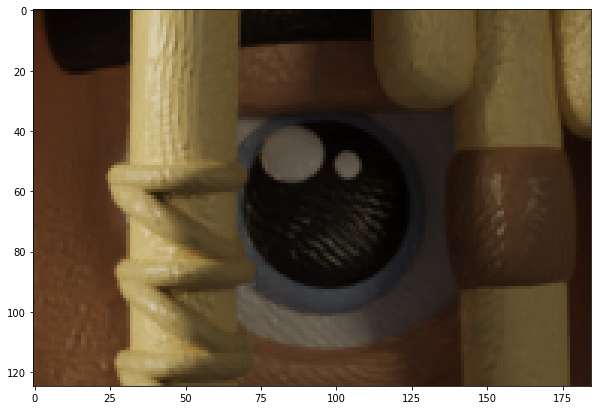

0880.png: YellowEyes


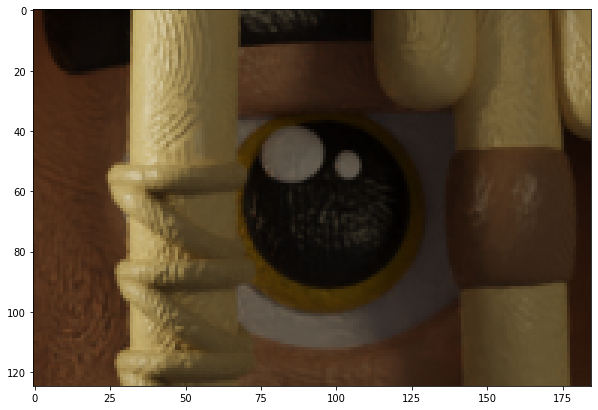

1085.png: YellowEyes


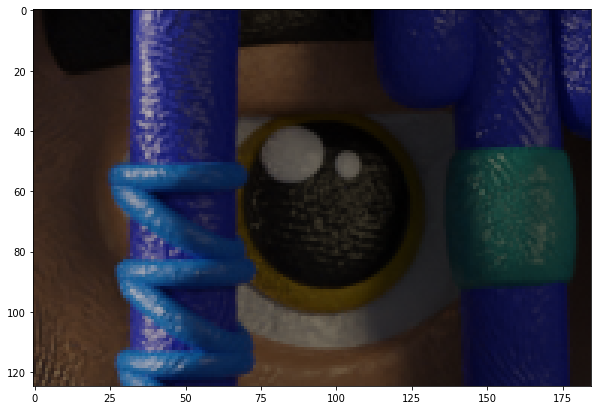

0649.png: YellowEyes


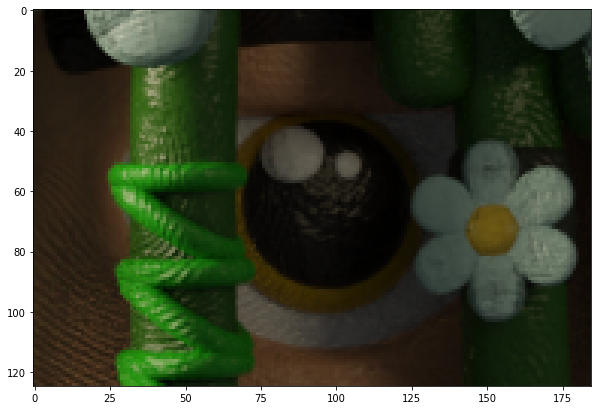

1027.png: GoldGlasses


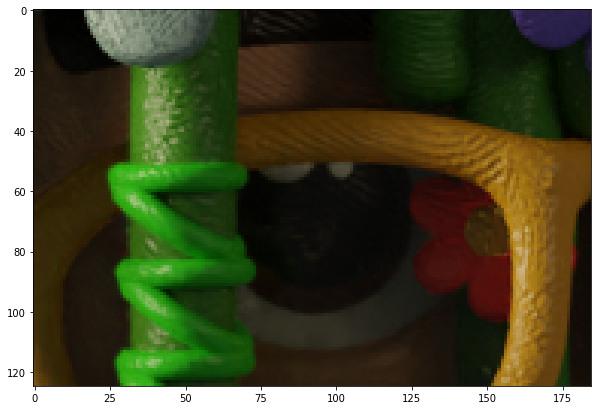

0145.png: GoldShades


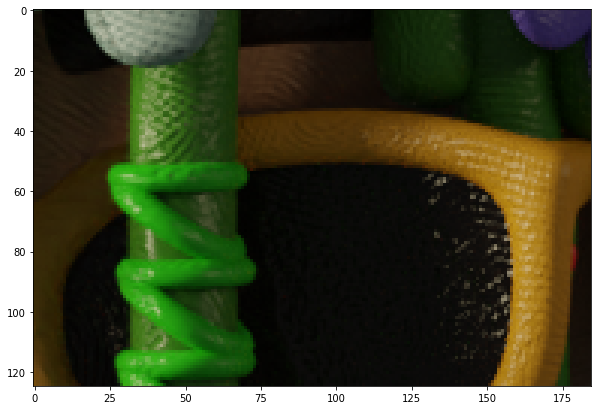

0169.png: YellowEyes


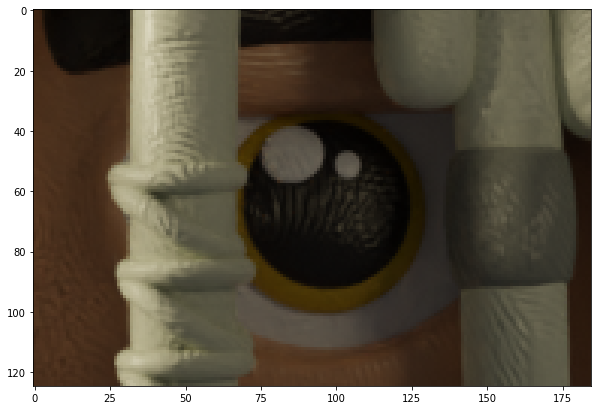

0657.png: GoldGlasses


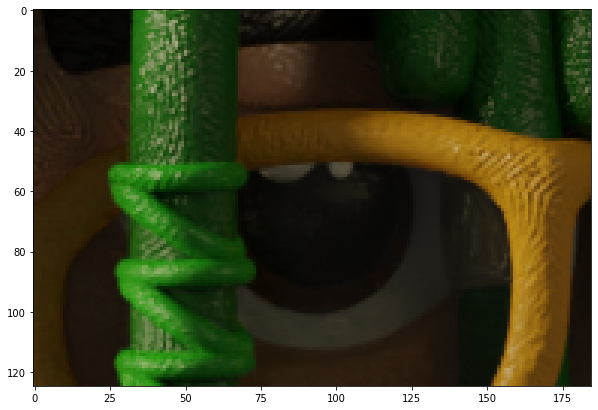

0788.png: YellowEyes


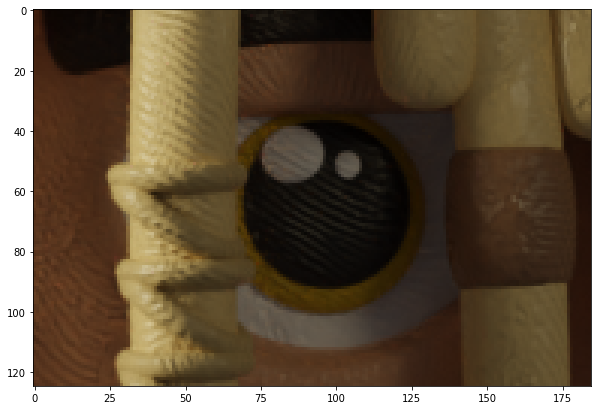

0509.png: BlackShades


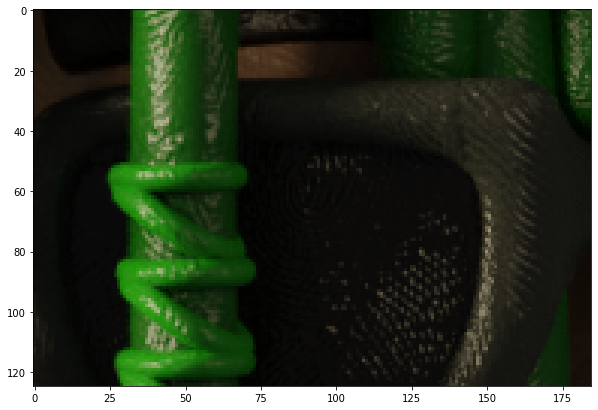

0802.png: BrownEyes


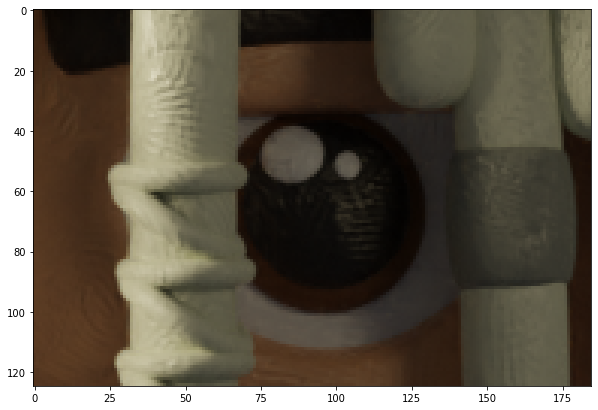

0842.png: BlueEyes


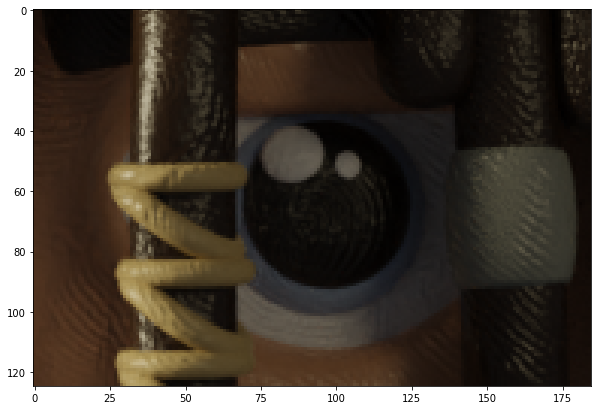

1044.png: BlueEyes


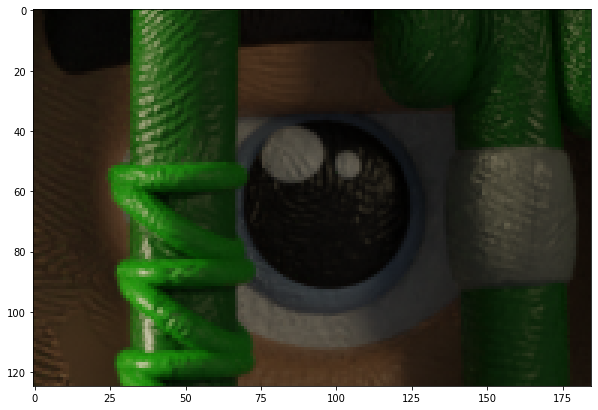

0011.png: BlueEyes


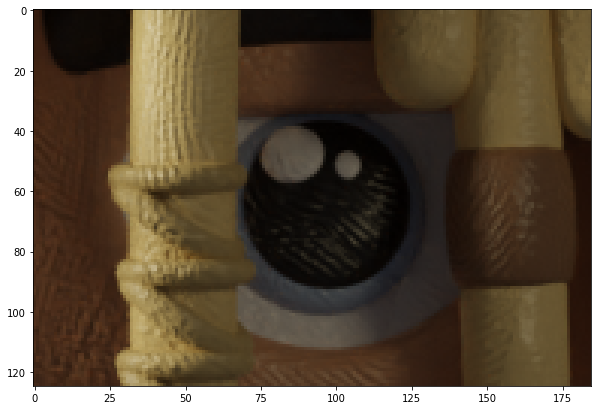

0968.png: RedEyes


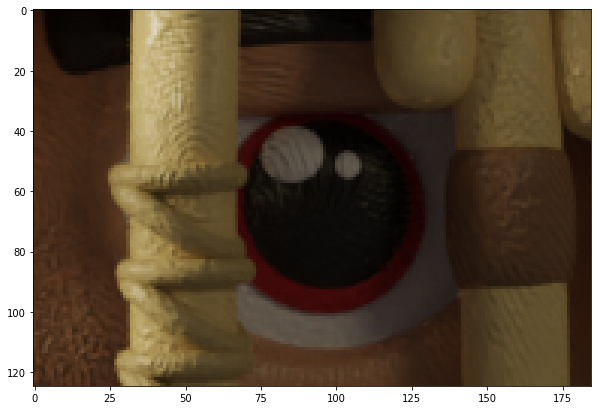

0671.png: GoldShades


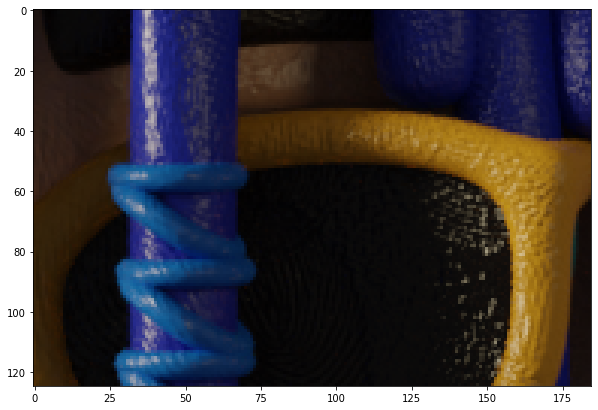

1067.png: GoldGlasses


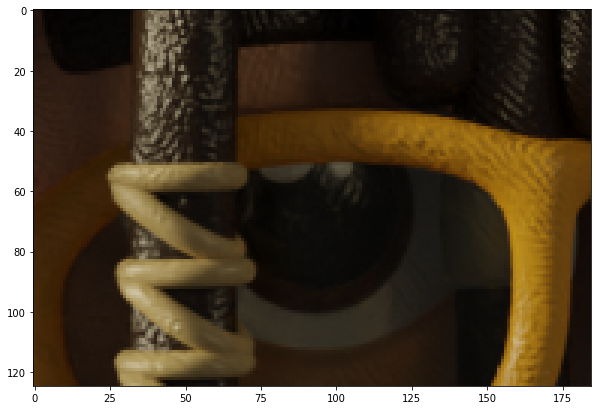

0524.png: BlackShades


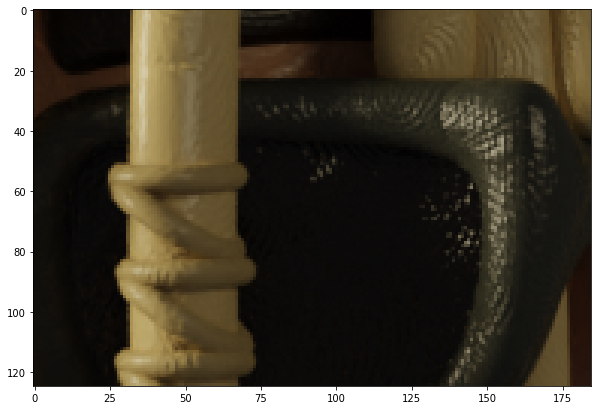

0755.png: BlueEyes


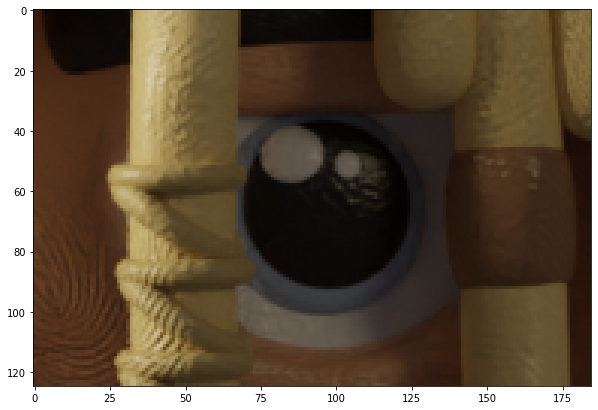

0730.png: BlackShades


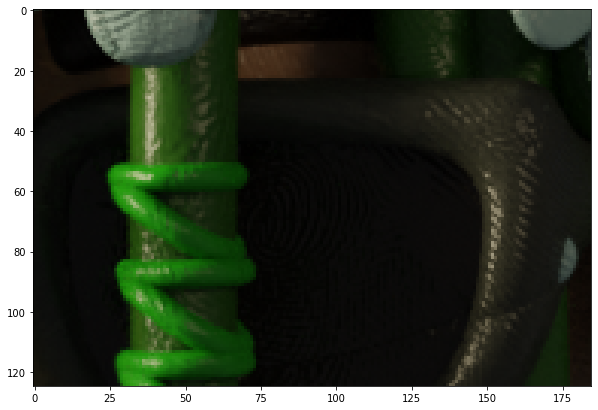

0584.png: GoldShades


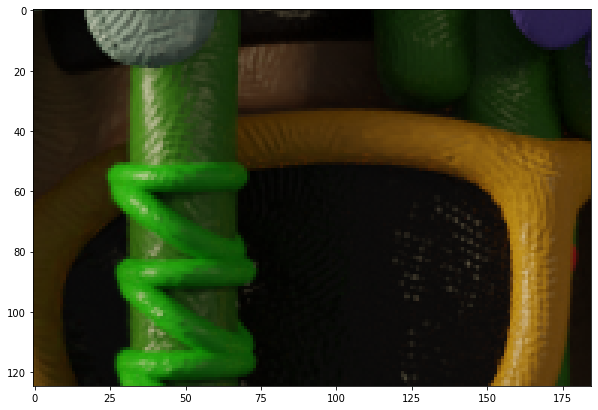

0718.png: BrownEyes


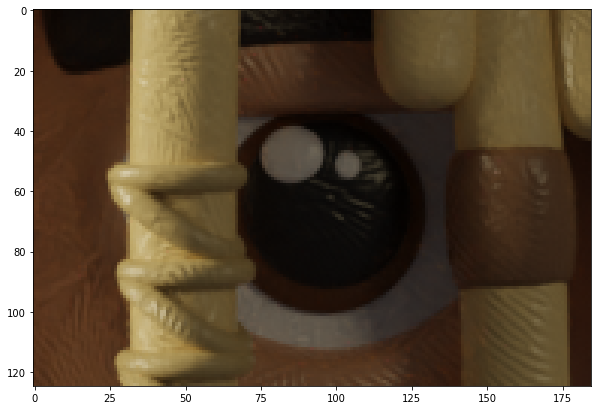

0713.png: BlueEyes


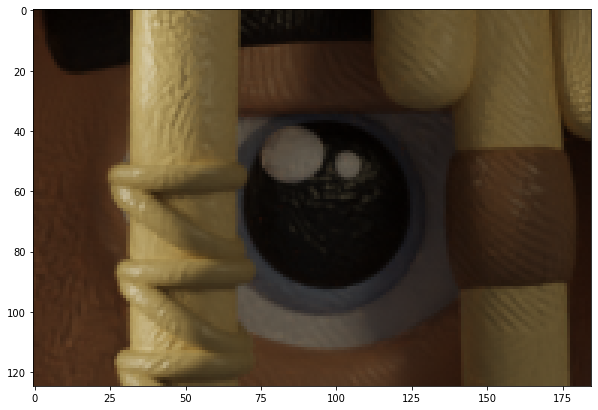

0272.png: GreenEyes


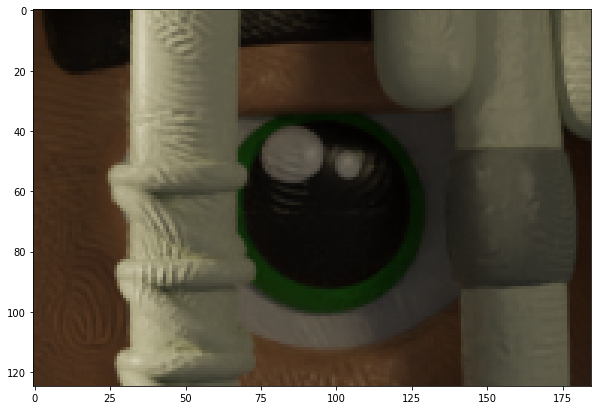

0777.png: GoldGlasses


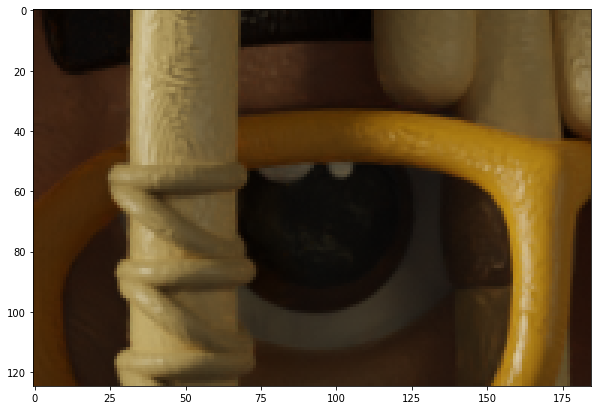

0217.png: GoldShades


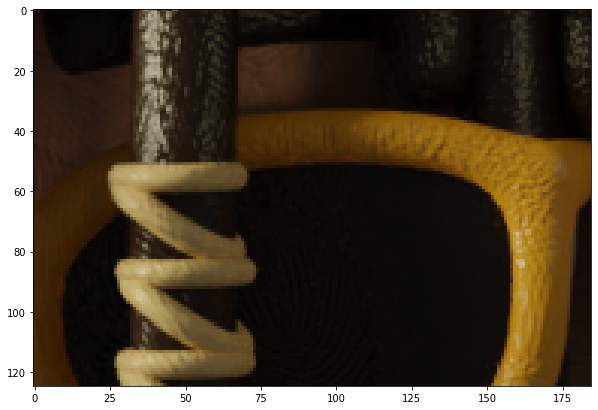

0247.png: BlackShades


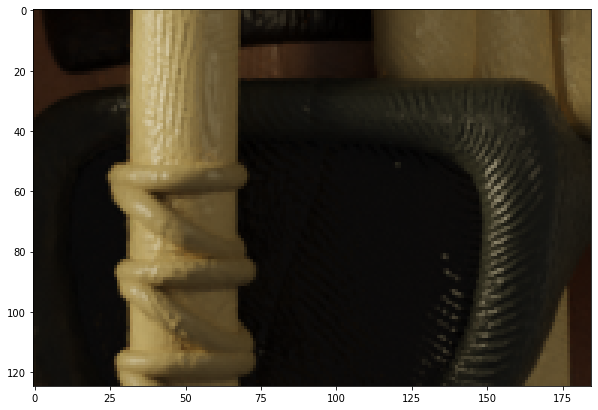

In [292]:
for i, (file, val) in enumerate(series.items()):
    plt.figure(figsize=(10, 10))
    im = Image.open(join('pics', file))
    im = im.crop((530, 380, 715, 505))
    print(f'{file}: {val}')
    plt.imshow(im)
    plt.show()